In [193]:
import sys  
sys.path.insert(0, 'C:\\Users\\espebh\\Documents\\Thesis\\code_ver2')
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
from helpers import m
from helpers.prob_utils import prob_random_clsf
from helpers.sine_fitting_utils import fit_sine

In [194]:
# Define which DB evolution to analyse
db_freq_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\frequency_dicts'
fish_names = m.FISH_NAMES_T2
tanknr = '2'
#date = '061022'
date = '280922'
camnr = '6'


In [195]:
# Load downbreathing dictionary
db = 'downbreathing_frequencies_' + date + '_t' + tanknr + '_c' + camnr + '_f2000'
infile = open(os.path.join(db_freq_path, db + '.pkl'),'rb')
downbreathing_dict = pickle.load(infile)
infile.close()
print(db)

downbreathing_frequencies_280922_t2_c6_f2000


In [196]:
# Structure the data from the downbreathing files

# evolution_of_avg_freq is a list, where one value is the average of the salmon individual frequency medians for each snippet. Hence the list contains 24 to 48 numbers, depending on the number of sniippets in the downbreathing. 
# Each of these points are the result of an average over 7 salmon individuals. Each of the seven salmon individual values come from a median, over all their respective frequency estimates.
# freq_list_for_all_individuals is a dict, where each salmon individual (key) maps to a list of frequencies. One frequency in this list is the median frequency over a single snippet. It is on the form {Aaron: [1.91, 1.82, ...], Baasha: []...}
# freq_dict_per_hour contain a freq_list_for_all_individuals value for each hour. The hour number is the key of the outer dictionary. Each frequency list contain all salmon estimates (not just the median) over an entire hour, except the first snippet.
# This is because the first snippet will have higher respiration frequency due to handling stress.
# dist is a list over the snippet indexes at which the salmon was disturbed.


import matplotlib.colors as mcolors
import scipy

# define parameters
nhours = 8
nfish = len(fish_names)
min_freq_count = 2
min_fish_nr_to_comp_avg = 1
peak_full_freq_evol = 0

# Initialize data structures
full_freq_evol_avg = []
full_freq_evol_dict = dict([(x,[]) for x in (fish_names)])
hourly_freq_evol_dict = dict([(x,dict([(x,[]) for x in (fish_names)])) for x in range(1, nhours)])
dist = dict([(x, np.nan) for x in range(1, 8)])

for file_name in downbreathing_dict['names']:
    try:
        list_idx = downbreathing_dict['names'].index(file_name)
        hour = int(file_name.split('_')[3][0])
        snippet = int(file_name.split('_')[4][1])
    except:
        break
    med_list = []
    for fish_name in downbreathing_dict['values'][list_idx].keys():
        freq_dict = downbreathing_dict['values'][list_idx]
        if snippet != 1:
            hourly_freq_evol_dict[hour][fish_name] = hourly_freq_evol_dict[hour][fish_name] + freq_dict[fish_name]
        else:
            dist[hour] = list_idx
        
        med = np.median(freq_dict[fish_name])
        std = np.std(freq_dict[fish_name])
        if len(freq_dict[fish_name]) <= min_freq_count:
            med = math.nan
        if not math.isnan(med):
            med_list.append(med)
        if fish_name == 'Felix':
            fish_name = 'Hosea'
        full_freq_evol_dict[fish_name].append(med)
    if len(med_list)>=min_fish_nr_to_comp_avg:
        full_freq_evol_avg.append(np.average(med_list))
        if np.average(med_list) > peak_full_freq_evol and snippet != 1:
            peak_full_freq_evol = np.average(med_list)
    else:
        full_freq_evol_avg.append(math.nan)


c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\espebh\Documents\Thesis\code_ver2\dat_gen_th\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\780229457.py:11: RuntimeWarning: Mean of empty slice
  plt.plot(np.linspace(1, nhours, num = nhours), np.nanmean(plot_array, axis = 1),  linestyle='--', linewidth = 2, color = 'k', label = 'Average')


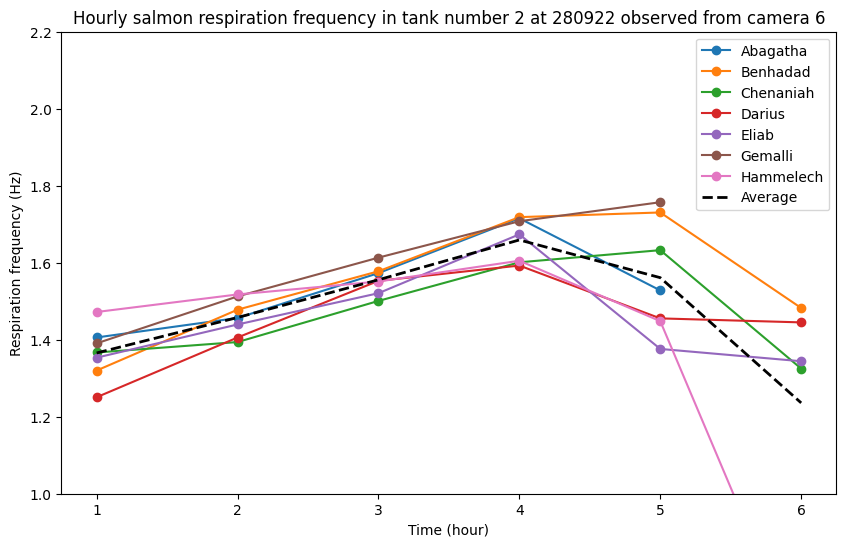

C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\780229457.py:19: RuntimeWarning: Mean of empty slice
  peak_hourly_freq_evol = np.nanmax(np.nanmean(plot_array, axis = 1))


In [197]:
# Plot the median over each fish each hour
import matplotlib
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

plot_array = np.ones([nhours, nfish])*math.nan

for hour, i in zip(hourly_freq_evol_dict.keys(), range(len(hourly_freq_evol_dict.keys()))):
    for fish_name, j in zip(hourly_freq_evol_dict[hour], range(len(hourly_freq_evol_dict[hour]))):
        plot_array[i][j] = np.median(hourly_freq_evol_dict[hour][fish_name])
plt.plot(np.linspace(1, nhours, num = nhours), plot_array, '-o', label = fish_names)
plt.plot(np.linspace(1, nhours, num = nhours), np.nanmean(plot_array, axis = 1),  linestyle='--', linewidth = 2, color = 'k', label = 'Average')
plt.xlabel('Time (hour)')
plt.ylabel('Respiration frequency (Hz)')
plt.legend()
plt.ylim(1, 2.2)
plt.title('Hourly salmon respiration frequency in tank number ' + tanknr + ' at ' + date + ' observed from camera ' + camnr)
plt.savefig(os.path.join('C:\\Users\\espebh\\Documents\\Thesis\\Report\\hourly respiration evolutions', 'hourly_' + db + '.png'))
plt.show()
peak_hourly_freq_evol = np.nanmax(np.nanmean(plot_array, axis = 1))


In [198]:
hour_avg = np.nanmean(plot_array, axis = 1).reshape(nhours,1)
hour_dev = np.subtract(plot_array, hour_avg)
dev_avg = np.nanmean(hour_dev, axis=0)
personalities = dict([(x, dev_avg[i]) for (x, i) in (zip(fish_names, range(len(fish_names))))])

print(personalities)

{'Abagatha': 0.015899189791713786, 'Benhadad': 0.07865182678606171, 'Chenaniah': -0.0025052668268348657, 'Darius': -0.022148128845545585, 'Eliab': -0.02124668892160886, 'Gemalli': 0.0763781894397706, 'Hammelech': -0.10964955821831011}


C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\2689154502.py:1: RuntimeWarning: Mean of empty slice
  hour_avg = np.nanmean(plot_array, axis = 1).reshape(nhours,1)


1.3656065870172682


C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\3789734755.py:6: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\\Users\\espebh\\Documents\\Project\\to_report\\oxygen data\\Data_O2_T_miniDOT_BIORELEVANS\\Data_O2_T_miniDOT_BIORELEVANS\\2-7450-380354\\Cat.txt', on_bad_lines='skip', skiprows=[0, 1, 2, 3, 4, 5, 6], skipinitialspace = True)
C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\3789734755.py:15: RuntimeWarning: Mean of empty slice
  low_vent = np.nanmean(plot_array, axis = 1)[0]


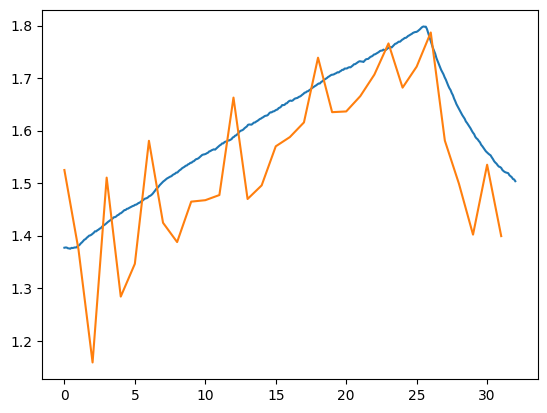

In [212]:
# Overlay with oxygen content
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\\Users\\espebh\\Documents\\Project\\to_report\\oxygen data\\Data_O2_T_miniDOT_BIORELEVANS\\Data_O2_T_miniDOT_BIORELEVANS\\2-7450-380354\\Cat.txt', on_bad_lines='skip', skiprows=[0, 1, 2, 3, 4, 5, 6], skipinitialspace = True)
start = 800
dates = df['UTC_Date_&_Time'].to_numpy()[1:]
day = date[0:2]
month = date[2:4]
mask = [1 if string.split('-')[2].startswith(day) and string.split('-')[1].startswith(month) else 0 for string in dates]
mask = np.insert(mask, 0, 0)
day_data = df.to_numpy()[np.where(mask)]
do = [-float(do) for do in day_data[:,6]]
low_vent = np.nanmean(plot_array, axis = 1)[0]
high_vent = peak_full_freq_evol
low_do = do[start]
high_do = max(do)
scale = (high_do-low_do)/(high_vent-low_vent)
offset = low_vent-low_do

print(do[start] + offset)
do_corr = [(d + offset)/scale + low_vent for d in do]

n_clips = len(full_freq_evol_avg)
time = np.linspace(0, n_clips, num = 12*n_clips)
plt.plot(time, do_corr[start:start+len(time)])
plt.plot(full_freq_evol_avg)
# for d in dist.keys():
#     print(np.nanmean(plot_array, axis = 1)[d])
#     plt.scatter(dist[d], np.nanmean(plot_array, axis = 1)[d-1])
#plt.plot(do[start:])
#print(do_corr[start])

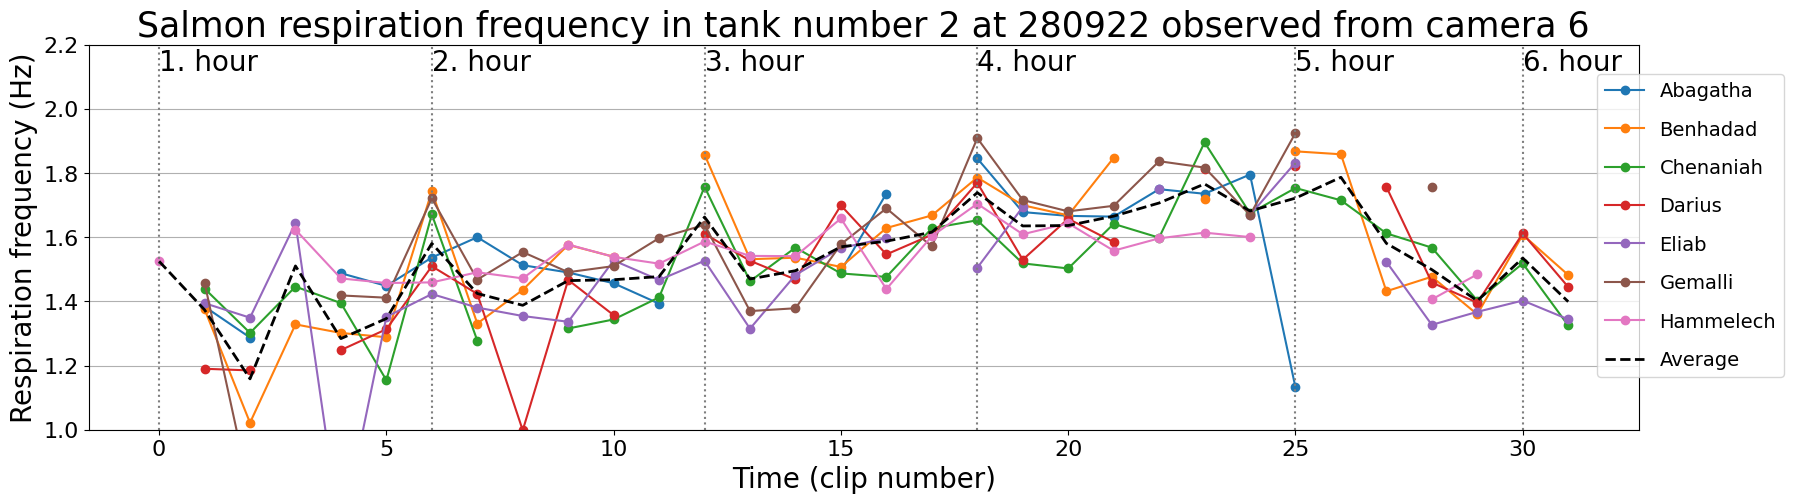

In [215]:
# Plot individual fish frequency each snippet

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
for i in range(len(fish_names)):
    plt.plot(np.array(range(len(full_freq_evol_dict[fish_names[i]])))[:], np.array(full_freq_evol_dict[fish_names[i]])[:], '-o', label = fish_names[i])
for d in dist.keys():
    if not math.isnan(dist[d]):
        plt.axvline(dist[d], linestyle = ':', color = mcolors.TABLEAU_COLORS['tab:gray'])
        plt.text(dist[d], 2.12, str(d) + '. hour', fontsize = 20)
    
plt.plot(full_freq_evol_avg, linestyle='--', linewidth = 2, color = 'k', label = 'Average')
#plt.plot(time, do_corr[start:start+len(time)], linestyle=':', linewidth = 2, color = 'k', label = 'Average')
plt.legend(fontsize = 14, ncols = 1, labelspacing = 1, bbox_to_anchor=(1.1, 0.95))
plt.ylim(1, 2.2)
plt.grid(visible=True, axis='y')
plt.title('Salmon respiration frequency in tank number ' + tanknr + ' at ' + date + ' observed from camera ' + camnr, fontsize = 25)
plt.xlabel('Time (clip number)', fontsize = 20)
plt.ylabel('Respiration frequency (Hz)', fontsize = 20)
ax.tick_params(labelsize=16)

plt.savefig(os.path.join('C:\\Users\\espebh\\Documents\\Thesis\\Report\\respiration evolutions', db + '.png'), dpi=300, bbox_inches = "tight")
plt.show()

1.3656065870172682


C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\3789734755.py:6: DtypeWarning: Columns (0,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\\Users\\espebh\\Documents\\Project\\to_report\\oxygen data\\Data_O2_T_miniDOT_BIORELEVANS\\Data_O2_T_miniDOT_BIORELEVANS\\2-7450-380354\\Cat.txt', on_bad_lines='skip', skiprows=[0, 1, 2, 3, 4, 5, 6], skipinitialspace = True)
C:\Users\espebh\AppData\Local\Temp\ipykernel_15616\3789734755.py:15: RuntimeWarning: Mean of empty slice
  low_vent = np.nanmean(plot_array, axis = 1)[0]


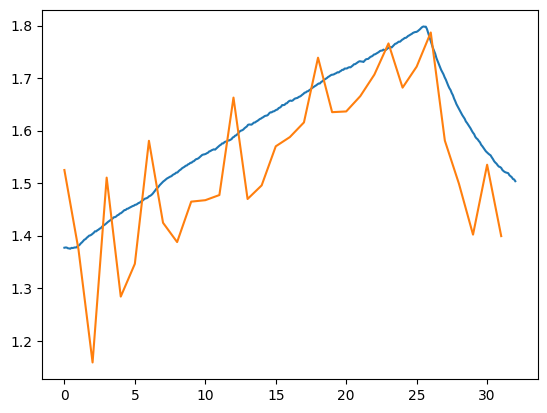

In [201]:
# Plot individual fish frequency with borken axis
# Inspired by https://stackoverflow.com/questions/32185411/break-in-x-axis-of-matplotlib

# fig, ax = plt.subplots(1, 2, sharey = True, figsize=(20, 5), facecolor = 'w')
# for i in range(len(fish_names)):
#     ax[0].plot(np.array(range(len(full_freq_evol_dict[fish_names[i]])))[:], np.array(full_freq_evol_dict[fish_names[i]])[:], '-o', label = fish_names[i])
#     ax[1].plot(np.array(range(len(full_freq_evol_dict[fish_names[i]])))[:], np.array(full_freq_evol_dict[fish_names[i]])[:], '-o', label = fish_names[i])
# for d in dist.keys():
#     if not math.isnan(dist[d]):
#         ax[0].axvline(dist[d], linestyle = ':', color = mcolors.TABLEAU_COLORS['tab:gray'])
#         ax[1].axvline(dist[d], linestyle = ':', color = mcolors.TABLEAU_COLORS['tab:gray'])
#         if d <= 3:
#             ax[0].text(dist[d], 2.12, str(d) + '. hour', fontsize = 20)
#         else:
#             ax[1].text(dist[d], 2.12, str(d) + '. hour', fontsize = 20)
    
# ax[0].plot(full_freq_evol_avg, linestyle='--', linewidth = 2, color = 'k', label = 'Average')
# ax[1].plot(full_freq_evol_avg, linestyle='--', linewidth = 2, color = 'k', label = 'Average')
# ax[0].set_xlim(0, 17)
# ax[1].set_xlim(18,30)
# ax[0].spines['right'].set_visible(False)
# ax[1].spines['left'].set_visible(False)
# ax[0].grid(visible=True, axis='y')
# ax[1].grid(visible=True, axis='y')
# ax[1].yaxis.tick_right()
# ax[1].yaxis.set_ticks_position('right')
# ax[0].tick_params(labelsize=16)
# ax[1].tick_params(labelsize=16)

# ax[1].legend(fontsize = 14, ncols = 2, labelspacing = 1, bbox_to_anchor=(0.42, 0.5))
# ax[0].set_ylim(1, 2.2)
# ax[1].set_ylim(1, 2.2)
# fig.suptitle('Salmon respiration frequency in tank number ' + tanknr + ' at ' + date + ' observed from camera ' + camnr, fontsize = 25)
# ax[0].set_xlabel('Time (clip number)', fontsize = 20)
# ax[0].set_ylabel('Respiration frequency (Hz)', fontsize = 20)
# ax[0].xaxis.set_label_coords(1.1, -0.1)

# d = .015
# kwargs = dict(transform=ax[0].transAxes, color='k', clip_on=False)
# ax[0].plot((1-d, 1+d), (-d, +d), **kwargs)
# ax[0].plot((1-d, 1+d), (1-d, 1+d), **kwargs)

# kwargs.update(transform=ax[1].transAxes) 
# ax[1].plot((-d, +d), (1-d, 1+d), **kwargs)
# ax[1].plot((-d, +d), (-d, +d), **kwargs)

# plt.savefig(os.path.join('C:\\Users\\espebh\\Documents\\Thesis\\Report\\respiration evolutions', db + '.png'), dpi=300, bbox_inches = "tight")
# plt.show()

In [202]:
# find the size of the handling disturbance
handling_frequency_resp_increase = dict([(x,[]) for x in (dist.keys())])
distval = list(dist.values())

for hour in dist.keys():
    idx = dist[hour]
    if math.isnan(idx):
         continue
    if hour == 0 or (hour-1 in dist and math.isnan(dist[hour-1])):
            diff = full_freq_evol_avg[idx] - full_freq_evol_avg[idx+1]
    else:
        diff = ((full_freq_evol_avg[idx] - full_freq_evol_avg[idx-1]) + (full_freq_evol_avg[idx] - full_freq_evol_avg[idx+1]))/2
    handling_frequency_resp_increase[hour] = diff


In [203]:
#dict_with_all_dbs: {downbreathing_frequencies_290922_t5_c7_f2000: {}}
dict_for_this_downbreathing = {'hourly_freq_evol': hourly_freq_evol_dict, 
                               'full_freq_evol_avg': full_freq_evol_avg,
                               'dist': dist,
                                'handling_frequency_resp_increase': handling_frequency_resp_increase,
                                'personalities': list(personalities.values()),
                                'peak_full_freq_evol': peak_full_freq_evol,
                                'peak_hourly_freq_evol': peak_hourly_freq_evol}


In [204]:
dict_with_all_dbs_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\frequency_dicts\\accumulated_data'
dict_with_all_dbs_file = open(os.path.join(dict_with_all_dbs_path, 'dict_with_all_dbs' + '.pkl'), 'rb')
dict_with_all_dbs = pickle.load(dict_with_all_dbs_file)
dict_with_all_dbs_file.close()

In [205]:
dict_with_all_dbs[db] = dict_for_this_downbreathing
print(dict_with_all_dbs)

{'downbreathing_frequencies_051022_t9_c8_f2000': {'hourly_freq_evol': {1: {'Aaron': [1.285341412308334, 1.3855377479209114, 1.2982001258212563, 0.48632949251303215, 0.5690618551132917, 0.9503376398257296, 1.1209455698522022, 1.4411401171949607, 1.09514443098305, 0.9219979634818207, 0.9882216176466445, 1.1889659945962818, 1.3492549780568877, 1.76023150938743, 1.1595303894040236, 1.2299873164435198, 1.1692502820414616, 1.1794363315442808, 0.8145339268078761, 0.8943372482234542, 1.0866646762781695, 0.9225202434557616, 1.0059201680609107, 1.492449093929451, 1.4357487120887507, 1.3870885888792508, 0.6433093554575409, 1.2120212775343349, 1.3754316450886954, 1.2656437268754301, 1.3351374262367492, 1.3384485492713005, 1.306006158651012, 1.4284129002633037, 1.5754851075075897, 1.6096691226864952, 1.5573570918845632, 1.2219587089613875, 1.5660291833000137, 1.670255358559718, 1.4052068878074044, 1.441602314689353, 1.4110916503595996], 'Baasha': [1.1414536258047958, 1.1854497676619138, 1.340622630

In [206]:
# Savedict_with_all_dbs
dict_with_all_dbs_path = 'C:\\Users\\espebh\\Documents\\Thesis\\data\\frequency_dicts\\accumulated_data'
dict_with_all_dbs_file = open(os.path.join(dict_with_all_dbs_path, 'dict_with_all_dbs' + '.pkl'), 'wb')
pickle.dump(dict_with_all_dbs, dict_with_all_dbs_file)
dict_with_all_dbs_file.close()

In [207]:
# # Find the deviation between the fish ventialtion and the average ventilation
# avg_dev_by_fish = dict([(x,[]) for x in (fish_names)])
# for fish_name in freq_list_for_all_individuals.keys():
#     for freq_idx in range(len(freq_list_for_all_individuals[fish_name])):
#         if math.isnan(freq_list_for_all_individuals[fish_name][freq_idx]):
#             continue
#         else:
#             avg_dev_by_fish[fish_name].append(freq_list_for_all_individuals[fish_name][freq_idx] - evolution_of_avg_freq[freq_idx])

# for fish_name in avg_dev_by_fish.keys():
#     avg_dev_by_fish[fish_name] = np.average(avg_dev_by_fish[fish_name])


# print(avg_dev_by_fish)

# When choosing whether to calculate deviation from the the first or second picture above, the tradeoff is whether the pipeline is erroneous, or whether it is a large difference between the breathing frequency of different clips during the same hour.
